# MiniProyecto 4: Optimización de parámetros

¡Bienvenidos al cuarto (mini)proyecto de la carrera de Data Science de Acamica! 

En este proyecto vamos a seguir trabajando (por última vez) con el dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo en este caso es optimizar los parámetros de los algoritmos que usamos en el proyecto pasado.

El dataset es el mismo del proyecto 3. Recordemos que las columnas que se agregan son:

* `barrios_match`: si coincide el barrio publicado con el geográfico vale 1, si no 0.

* `PH`, `apartment`, `house`: variables binarias que indican el tipo de propiedad.

* dummies de barrios: variables binarias con 1 o 0 según el barrio.

La métrica que vamos a usar para medir es RMSE (raíz del error cuadréatico medio), cuya fórmula es:

$$RMSE = \sqrt{\frac{\sum_{t=1}^n (\hat y_t - y_t)^2}{n}}$$

## Pandas - Levantamos el dataset

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '%.3f' % x)
path_dataset = 'dataset/datos_properati_limpios_model.csv'
df = pd.read_csv(path_dataset)

**Separá** el dataset en entrenamiento (80%) y test (20%) utilizando como target la columna `price_aprox_usd`

In [121]:
# Hacé la separación en esta celda
from sklearn.model_selection import train_test_split

X = df.drop(['price_aprox_usd'], axis=1)
y = df['price_aprox_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print('Datos en Xtrain: {}'.format(X_train.shape)) 
print('Datos en Xtest: {}'.format(X_test.shape)) 
print('Datos en ytrain: {}'.format(y_train.shape)) 
print('Datos en ytest: {}'.format(y_test.shape)) 
print('Porcentaje de datos x: {}'.format( round(X_test.shape[0] / X.shape[0], 2) )) 
print('Porcentaje de datos y: {}'.format( round(y_test.shape[0] / y.shape[0], 2) )) 

Datos en Xtrain: (5100, 58)
Datos en Xtest: (1276, 58)
Datos en ytrain: (5100,)
Datos en ytest: (1276,)
Porcentaje de datos x: 0.2
Porcentaje de datos y: 0.2


In [122]:
# Esto es lo que hace
import numpy as np
np.random.seed(123)
from sklearn.model_selection import train_test_split
X = df.drop(['price_aprox_usd'], axis=1)
y = df['price_aprox_usd']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(X_train.shape[0], X_test.shape[0])

5100 1276


## Scikit-learn - Entrenamiento

Para repasar los parámetros de árboles de decisión en Scikit-learn: 

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

En primer lugar veamos como hacer cross validation. Para eso necesitamos definir la cantidad de folds, en este caso vamos a usar 5.

GridSearchCV nos permite testear a través de un espacio de búsqueda de parámetros la mejor combinación posible dado un estimador.

Por ejemplo, en este caso probamos la profundidad máxima y la máxima cantidad de features para hacer los split. Ambos entre 1 y 5.
Recordemos que para hacer la optimización scikit-learn usa la métrica `neg_mean_squared_error` en lugar de `mean_squared_error`.

**Creá** una variable `param_grid` con valores del 1 al 5 para los atributos `max_depth` y `max_features`. 

In [123]:
# Creá en esta celda la variable param_grid

param_grid = [
    {'max_depth': [1, 2, 3, 4, 5], 'max_features': [1, 2, 3, 4, 5]},
]

**Importá** `GridSearchCV` y `DecisionTreeRegressor`.

**Creá** una variable `grid_search` y asignale un `GridSearchCV` que recorra el `param_grid` que creaste con el algoritmos `DecisionTreeRegressor` y el un scoring de `neg_mean_squared_error`

In [124]:
# Importa y crea un GridSearchCV en esta celda
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
grid_search = GridSearchCV(tree_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error', 
                           return_train_score='True', refit='True')

A continuación, realizá el `fit` del `grid_search` con el conjunto de entrenamiento

In [125]:
# Hace el fit de grid search en esta celda
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'max_depth': [1, 2, 3, 4, 5],
                          'max_features': [1, 2, 3, 4, 5]}],
             pre_dispatch='2*n_jobs', 

Revisemos los resultados. Recordemos que no están expresados en RMSE.

In [126]:
grid_search.scorer_

make_scorer(mean_squared_error, greater_is_better=False)

**Mostrá** los `grid_scores` obtenidos durante el `grid_search`

In [127]:
grid_search.cv_results_

{'mean_fit_time': array([0.00519423, 0.00399885, 0.00402527, 0.0040935 , 0.00390382,
        0.00379143, 0.00404015, 0.0039834 , 0.003824  , 0.00408239,
        0.00385504, 0.00386596, 0.00406332, 0.00510664, 0.00402064,
        0.00383058, 0.00410805, 0.00422897, 0.0042078 , 0.00428123,
        0.00412955, 0.00417199, 0.00447006, 0.00432734, 0.00483041]),
 'std_fit_time': array([8.94485268e-04, 3.82825784e-04, 3.73016741e-04, 3.98240812e-04,
        2.03511194e-04, 1.12105075e-04, 3.30856911e-04, 3.70151477e-04,
        5.31212432e-05, 2.94067041e-04, 1.21078560e-04, 1.18944828e-04,
        1.76953967e-04, 5.05509134e-04, 1.13384657e-04, 4.93317021e-05,
        1.72638602e-04, 1.97906470e-04, 8.68726637e-05, 4.13805138e-04,
        2.25795793e-04, 1.06025747e-04, 2.70868161e-04, 1.44283108e-04,
        4.24497632e-04]),
 'mean_score_time': array([0.00171766, 0.001442  , 0.00147691, 0.00138397, 0.00137138,
        0.00132613, 0.00142727, 0.00134034, 0.00133204, 0.00140667,
        0.00

In [128]:
# Mostrá los grid_scores en esta celda
grid_search.cv_results_['mean_train_score']

array([-9.55588857e+08, -9.57468890e+08, -9.72983861e+08, -9.23628746e+08,
       -9.74037208e+08, -9.27697741e+08, -9.22782382e+08, -9.18594195e+08,
       -9.17251310e+08, -9.26891537e+08, -9.46259883e+08, -9.06038074e+08,
       -8.53680623e+08, -7.71936220e+08, -8.64641322e+08, -9.60984110e+08,
       -9.35611617e+08, -7.91252565e+08, -6.90511634e+08, -8.74058455e+08,
       -8.39258972e+08, -8.16057480e+08, -7.53021816e+08, -8.00184436e+08,
       -8.24706576e+08])

De esta manera, el valor con mejor resultado (dado el espacio de búsqueda definido) es `max_depth` 3 y `max_features` 3.

**Mostrá** el mejor score y los mejores parámetros encontrados por `grid_search`

In [129]:
# Mostrás los resultados en esta celda
#Mejores parámetros
print("Mejores parámetros: ")
grid_search.best_params_

Mejores parámetros: 


{'max_depth': 4, 'max_features': 4}

In [130]:
#Mejores Score
print("Mejor Score: ")
grid_search.best_score_

Mejor Score: 


-713698124.9712428

In [131]:
rmses_train_score_mss = np.sqrt(-grid_search.cv_results_["mean_train_score"])
rmses_test_score_mss = np.sqrt(-grid_search.cv_results_["mean_test_score"])
print(rmses_train_score_mss)
print(rmses_test_score_mss)

[30912.60029123 30942.99420572 31192.68922801 30391.26100603
 31209.56916574 30458.13095171 30377.33335566 30308.31891279
 30286.15707341 30444.89344099 30761.33746805 30100.46634338
 29217.81345087 27783.74020398 29404.78399914 30999.74371442
 30587.76907368 28129.21194524 26277.58806287 29564.47962086
 28969.96672043 28566.71978936 27441.24297365 28287.53145448
 28717.70491712]
[31109.73284714 31111.25977036 31199.87865805 30431.87394255
 31276.68588291 30646.24870245 30251.41587674 30216.17830125
 30246.73051206 30446.12285887 30864.30597708 30273.77796642
 29326.53637572 27904.53097374 29452.70546479 31111.13556028
 30818.77969799 28263.42541355 26715.12914008 29715.32738582
 29371.1509691  28764.74334538 27982.70271826 28639.52671136
 29393.90218227]


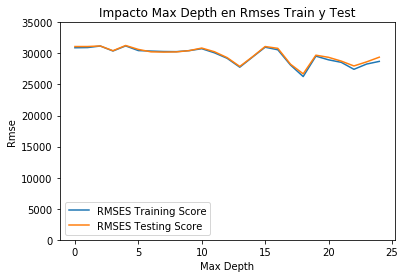

In [132]:
plt.plot(rmses_train_score_mss, label="RMSES Training Score")
plt.plot(rmses_test_score_mss, label="RMSES Testing Score")
plt.ylim((0, 35000))
plt.legend(loc="best")
plt.xlabel("Max Depth")
plt.ylabel("Rmse")
plt.title("Impacto Max Depth en Rmses Train y Test")
plt.show()

Convertimos a RMSE.

In [133]:
def nmsq2rmse(score):
    return np.round(np.sqrt(-score), 2)

rmse_score = nmsq2rmse(grid_search.best_score_)
print("Mejor Score RMSE: ")
rmse_score

Mejor Score RMSE: 


26715.13

__Encontrar el mejor modelo para el espacio de búsqueda dado__

* `"min_samples_split": [2, 10, 20]`
* `"max_depth": [None, 2, 5, 10, 15]`
* `"min_samples_leaf": [1, 5, 10, 15]`
* `"max_leaf_nodes": [None, 5, 10, 20]`

Recordemos que `GridSearchCV` tiene como parámetro default `refit=True`. Esto significa que luego de hacer la corrida se ajusta el mejor modelo al conjunto de datos de entrada. De esta manera, se puede predecir directamente usando `best_estimator_`.

In [134]:
#Predicción para el modelo anterior
optimised_decision_tree = grid_search.best_estimator_
print(optimised_decision_tree.predict(X_test))

[119629.14003193 119629.14003193 119629.14003193 ... 119629.14003193
 119629.14003193 153675.67567568]


In [135]:
#Predicción para el nuevo modelo
parameters={'min_samples_split' : [2,10,20], 'max_depth': [None, 2, 5, 10, 15], 'min_samples_leaf': [1, 5, 10, 15],
           'max_leaf_nodes': [None, 5, 10, 20]}
tree_regNewModel = DecisionTreeRegressor()
grid_searchNewModel = GridSearchCV(tree_regNewModel, parameters)
grid_searchNewModel.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [None, 2, 5, 10, 15],
                         'max_leaf_nodes': [None, 5, 10, 20],
                         'min_

In [136]:
#Predicción para el modelo nuevo
optimised_decision_treeNewModel = grid_searchNewModel.best_estimator_
print(optimised_decision_treeNewModel.predict(X_test))

[103438.66037736 135705.88235294 156075.75927273 ... 158568.10778443
 127468.18181818 149892.67036697]


In [137]:
from sklearn.metrics import mean_squared_error
y_opt_pred = optimised_decision_tree.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_opt_pred))
np.round(rmse)

30972.0

Vemos los primeros 10 resultados de la predicción del valor de propiedades.

In [138]:
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_opt_pred)

In [139]:
predicciones = pd.concat([val_real.rename('Valor real'),val_pred.rename('Valor Pred') ,abs(val_real-val_pred).rename('Dif(+/-)')] ,  axis=1)

In [140]:
predicciones.head(10)

,Valor real,Valor Pred,Dif(+/-)
0,80000.000,119629.140,39629.140
1,128000.000,119629.140,8370.860
2,150000.000,119629.140,30370.860
3,85000.000,119629.140,34629.140
4,135000.000,119629.140,15370.860
5,135000.000,133038.296,1961.704
6,68000.000,119629.140,51629.140
7,110000.000,133038.296,23038.296
8,134000.000,119629.140,14370.860
9,110000.000,119629.140,9629.140


# Validación modelo optimizado NewModel
Verificación del modelo encontrado para el espacio de búsqueda
* `"min_samples_split": [2, 10, 20]`
* `"max_depth": [None, 2, 5, 10, 15]`
* `"min_samples_leaf": [1, 5, 10, 15]`
* `"max_leaf_nodes": [None, 5, 10, 20]`

In [141]:
y_opt_predNewModel = optimised_decision_treeNewModel.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_opt_predNewModel))
np.round(rmse)
val_realNewModel = pd.Series(y_test.values)
val_predNewModel = pd.Series(y_opt_predNewModel)

prediccionesNewModel = pd.concat([val_realNewModel.rename('Valor real'),val_predNewModel.rename('Valor Pred') ,abs(val_realNewModel-val_predNewModel).rename('Dif(+/-)')] ,  axis=1)
prediccionesNewModel.head(10)

,Valor real,Valor Pred,Dif(+/-)
0,80000.000,103438.660,23438.660
1,128000.000,135705.882,7705.882
2,150000.000,156075.759,6075.759
3,85000.000,102400.991,17400.991
4,135000.000,135571.622,571.622
5,135000.000,109560.000,25440.000
6,68000.000,75181.250,7181.250
7,110000.000,140444.444,30444.444
8,134000.000,158431.250,24431.250
9,110000.000,76701.202,33298.798
